## 1. Importações das Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11


## 2. Leitura dos Datasets

### Carregando os 4 arquivos CSV:
- **campeonato-brasileiro-full.csv**: Dados das partidas (8.786 registros)
- **campeonato-brasileiro-gols.csv**: Dados dos gols marcados (9.862 registros)
- **campeonato-brasileiro-cartoes.csv**: Dados de cartões (20.954 registros)
- **campeonato-brasileiro-estatisticas-full.csv**: Estatísticas das partidas (17.571 registros)

In [2]:
# Carregando os datasets
df_partidas = pd.read_csv('campeonato-brasileiro-full.csv', encoding='utf-8')
df_gols = pd.read_csv('campeonato-brasileiro-gols.csv', encoding='utf-8')
df_cartoes = pd.read_csv('campeonato-brasileiro-cartoes.csv', encoding='utf-8')
df_estatisticas = pd.read_csv('campeonato-brasileiro-estatisticas-full.csv', encoding='utf-8')

print(f"Partidas: {len(df_partidas):,} registros")
print(f"Gols: {len(df_gols):,} registros")
print(f"Cartões: {len(df_cartoes):,} registros")
print(f"Estatísticas: {len(df_estatisticas):,} registros")
print("\nDatasets carregados com sucesso!")

Partidas: 8,785 registros
Gols: 9,861 registros
Cartões: 20,953 registros
Estatísticas: 17,570 registros

Datasets carregados com sucesso!


## 3. Análise Exploratória - Dataset de Partidas

### 3.1. Visualização Geral dos Dados

In [3]:
df_partidas.head(10)

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP
5,6,1,30/03/2003,16:00,Criciuma,Fluminense,NaN,NaN,NaN,NaN,Criciuma,Heriberto Hulse,2,0,SC,RJ
6,7,1,30/03/2003,16:00,Juventude,Sao Paulo,NaN,NaN,NaN,NaN,-,Alfredo Jaconi,2,2,RS,SP
7,8,1,30/03/2003,16:00,Fortaleza,Bahia,NaN,NaN,NaN,NaN,-,Castelão,0,0,CE,BA
8,9,1,30/03/2003,16:00,Cruzeiro,Sao Caetano,NaN,NaN,NaN,NaN,-,Mineirão,2,2,MG,SP
9,10,1,30/03/2003,16:00,Vitoria,Figueirense,NaN,NaN,NaN,NaN,-,Barradão,1,1,BA,SC


### 3.2. Informações sobre as Colunas

In [4]:
df_partidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8785 non-null   int64 
 1   rodata              8785 non-null   int64 
 2   data                8785 non-null   object
 3   hora                8785 non-null   object
 4   mandante            8785 non-null   object
 5   visitante           8785 non-null   object
 6   formacao_mandante   3810 non-null   object
 7   formacao_visitante  3810 non-null   object
 8   tecnico_mandante    4175 non-null   object
 9   tecnico_visitante   4175 non-null   object
 10  vencedor            8785 non-null   object
 11  arena               8785 non-null   object
 12  mandante_Placar     8785 non-null   int64 
 13  visitante_Placar    8785 non-null   int64 
 14  mandante_Estado     8785 non-null   object
 15  visitante_Estado    8785 non-null   object
dtypes: int64(4), object(12)


### 3.3. Estatísticas Descritivas

In [5]:
df_partidas.describe(include='all')

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
count,8785.000000,8785.000000,8785,8785,8785,8785,3810,3810,4175,4175,8785,8785,8785.000000,8785.000000,8785,8785
unique,NaN,NaN,2052,189,45,45,22,21,237,241,46,168,NaN,NaN,15,15
top,NaN,NaN,06/07/2008,16:00,Fluminense,Flamengo,4-2-3-1,4-2-3-1,L. Venker de Menezes,L. Venker de Menezes,-,Maracanã,NaN,NaN,SP,SP
freq,NaN,NaN,15,1930,428,429,2182,2046,141,144,2322,669,NaN,NaN,2173,2173
mean,4393.000000,20.105862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.535572,1.027319,NaN,NaN
std,2536.155391,11.425072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.224891,1.025375,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,2197.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
50%,4393.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
75%,6589.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN


### 3.4. Verificação de Valores Nulos

In [6]:
# Análise de valores nulos
nulos_partidas = df_partidas.isnull().sum()
nulos_pct = (nulos_partidas / len(df_partidas) * 100).round(2)

nulos_df = pd.DataFrame({
    'Coluna': nulos_partidas.index,
    'Valores Nulos': nulos_partidas.values,
    'Percentual (%)': nulos_pct.values
})

nulos_df[nulos_df['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)

,Coluna,Valores Nulos,Percentual (%)
6,formacao_mandante,4975,56.63
7,formacao_visitante,4975,56.63
8,tecnico_mandante,4610,52.48
9,tecnico_visitante,4610,52.48


### 3.5. Visualização de Valores Nulos

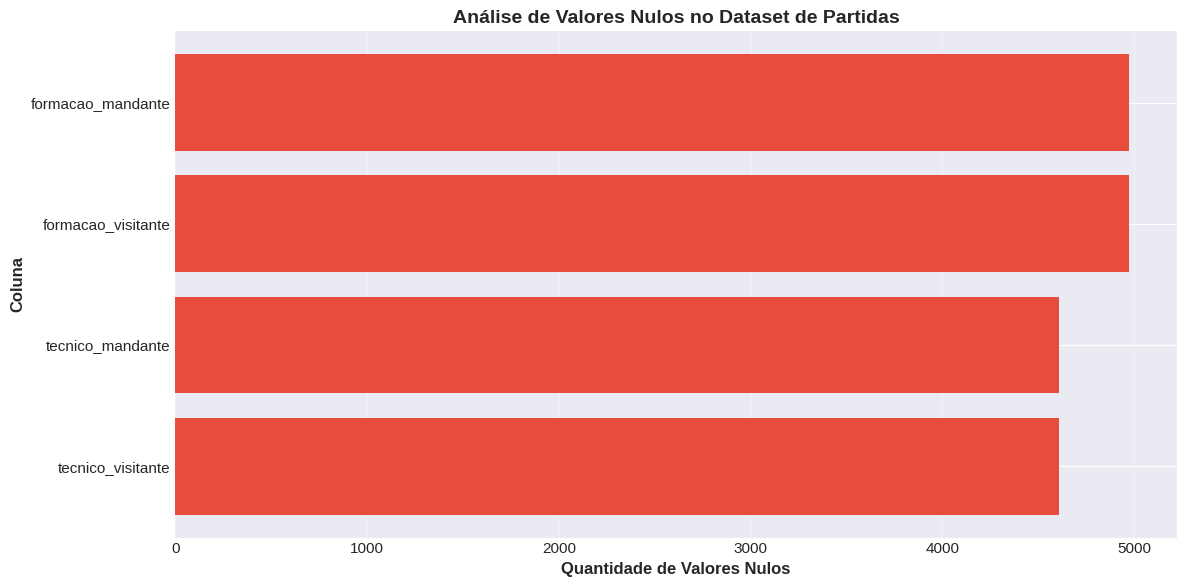

In [7]:
# Gráfico de valores nulos
nulos_top = nulos_df[nulos_df['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=True)

if len(nulos_top) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(nulos_top['Coluna'], nulos_top['Valores Nulos'], color='#e74c3c')
    plt.xlabel('Quantidade de Valores Nulos', fontsize=12, fontweight='bold')
    plt.ylabel('Coluna', fontsize=12, fontweight='bold')
    plt.title('Análise de Valores Nulos no Dataset de Partidas', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Não há valores nulos no dataset!")

## 4. Análise Temporal

### 4.1. Conversão e Preparação de Datas

In [8]:
# Convertendo a coluna data para datetime
df_partidas['data'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y', errors='coerce')
df_partidas['ano'] = df_partidas['data'].dt.year
df_partidas['mes'] = df_partidas['data'].dt.month
df_partidas['dia_semana'] = df_partidas['data'].dt.day_name()

print(f"Período analisado: {df_partidas['ano'].min()} a {df_partidas['ano'].max()}")
print(f"Total de temporadas: {df_partidas['ano'].nunique()}")

Período analisado: 2003 a 2024
Total de temporadas: 22


### 4.2. Distribuição de Partidas por Ano

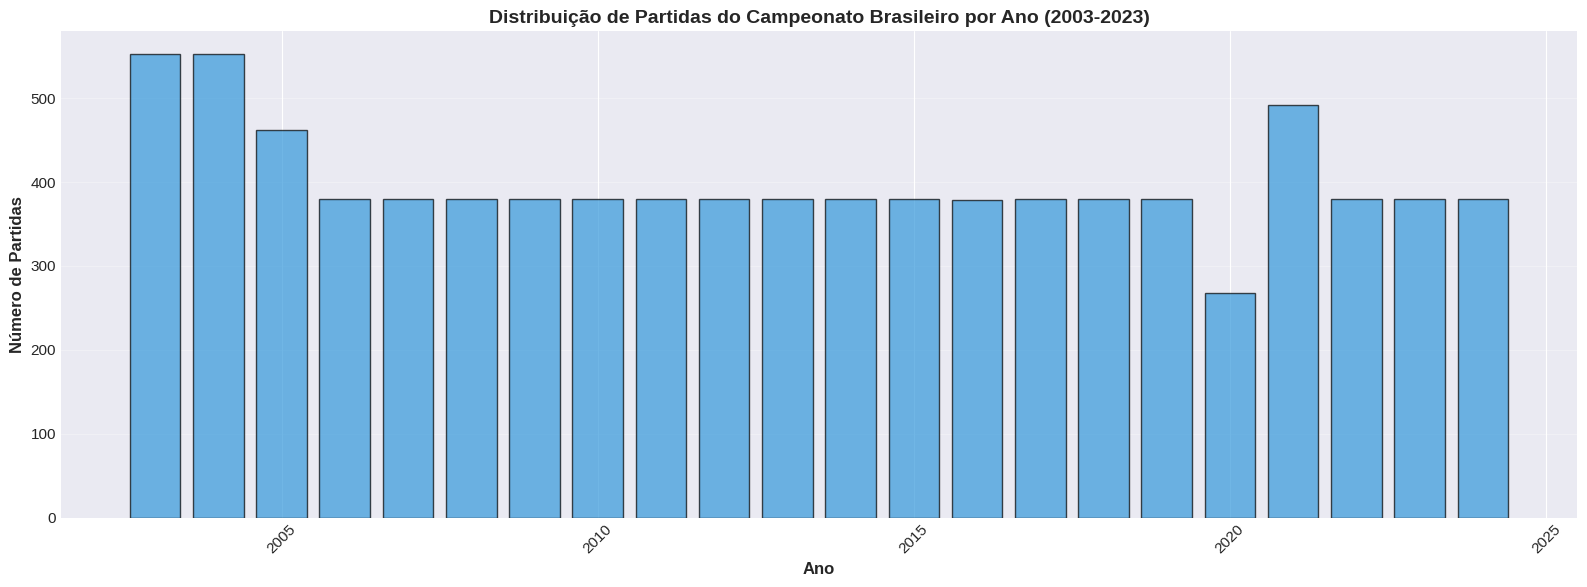


Média de partidas por ano: 399
Ano com mais partidas: 2003 (552 partidas)
Ano com menos partidas: 2020 (268 partidas)


In [9]:
# Partidas por ano
partidas_por_ano = df_partidas['ano'].value_counts().sort_index()

plt.figure(figsize=(16, 6))
plt.bar(partidas_por_ano.index, partidas_por_ano.values, color='#3498db', edgecolor='black', alpha=0.7)
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Número de Partidas', fontsize=12, fontweight='bold')
plt.title('Distribuição de Partidas do Campeonato Brasileiro por Ano (2003-2023)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nMédia de partidas por ano: {partidas_por_ano.mean():.0f}")
print(f"Ano com mais partidas: {partidas_por_ano.idxmax()} ({partidas_por_ano.max()} partidas)")
print(f"Ano com menos partidas: {partidas_por_ano.idxmin()} ({partidas_por_ano.min()} partidas)")

### 4.3. Distribuição de Partidas por Dia da Semana

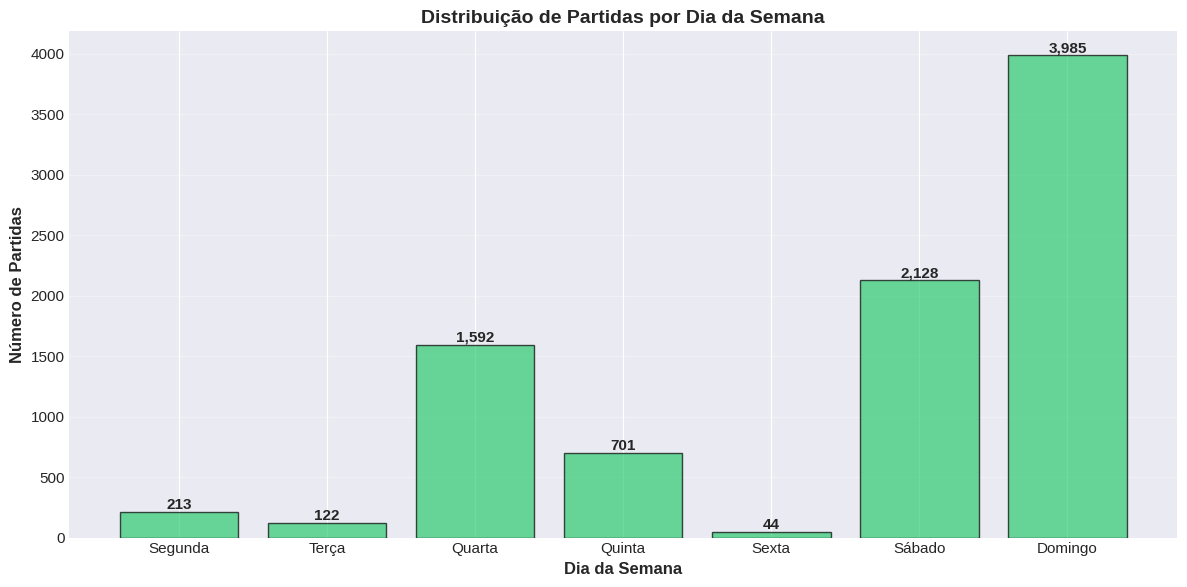

In [10]:
# Ordem dos dias da semana
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dias_pt = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

partidas_dia_semana = df_partidas['dia_semana'].value_counts().reindex(ordem_dias)

plt.figure(figsize=(12, 6))
bars = plt.bar(dias_pt, partidas_dia_semana.values, color='#2ecc71', edgecolor='black', alpha=0.7)
plt.xlabel('Dia da Semana', fontsize=12, fontweight='bold')
plt.ylabel('Número de Partidas', fontsize=12, fontweight='bold')
plt.title('Distribuição de Partidas por Dia da Semana', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Adicionando valores no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Análise de Times

### 5.1. Times Participantes

In [11]:
# Todos os times que já participaram
times_mandante = set(df_partidas['mandante'].unique())
times_visitante = set(df_partidas['visitante'].unique())
todos_times = sorted(times_mandante.union(times_visitante))

print(f"Total de times que já participaram do Brasileirão: {len(todos_times)}")
print(f"\nLista de times:\n")
for i, time in enumerate(todos_times, 1):
    print(f"{i:2d}. {time}")

Total de times que já participaram do Brasileirão: 45

Lista de times:

 1. America-MG
 2. America-RN
 3. Athletico-PR
 4. Atletico-GO
 5. Atletico-MG
 6. Avai
 7. Bahia
 8. Barueri
 9. Botafogo-RJ
10. Bragantino
11. Brasiliense
12. CSA
13. Ceara
14. Chapecoense
15. Corinthians
16. Coritiba
17. Criciuma
18. Cruzeiro
19. Cuiaba
20. Figueirense
21. Flamengo
22. Fluminense
23. Fortaleza
24. Goias
25. Gremio
26. Gremio Prudente
27. Guarani
28. Internacional
29. Ipatinga
30. Joinville
31. Juventude
32. Nautico
33. Palmeiras
34. Parana
35. Paysandu
36. Ponte Preta
37. Portuguesa
38. Santa Cruz
39. Santo Andre
40. Santos
41. Sao Caetano
42. Sao Paulo
43. Sport
44. Vasco
45. Vitoria


### 5.2. Times com Mais Participações

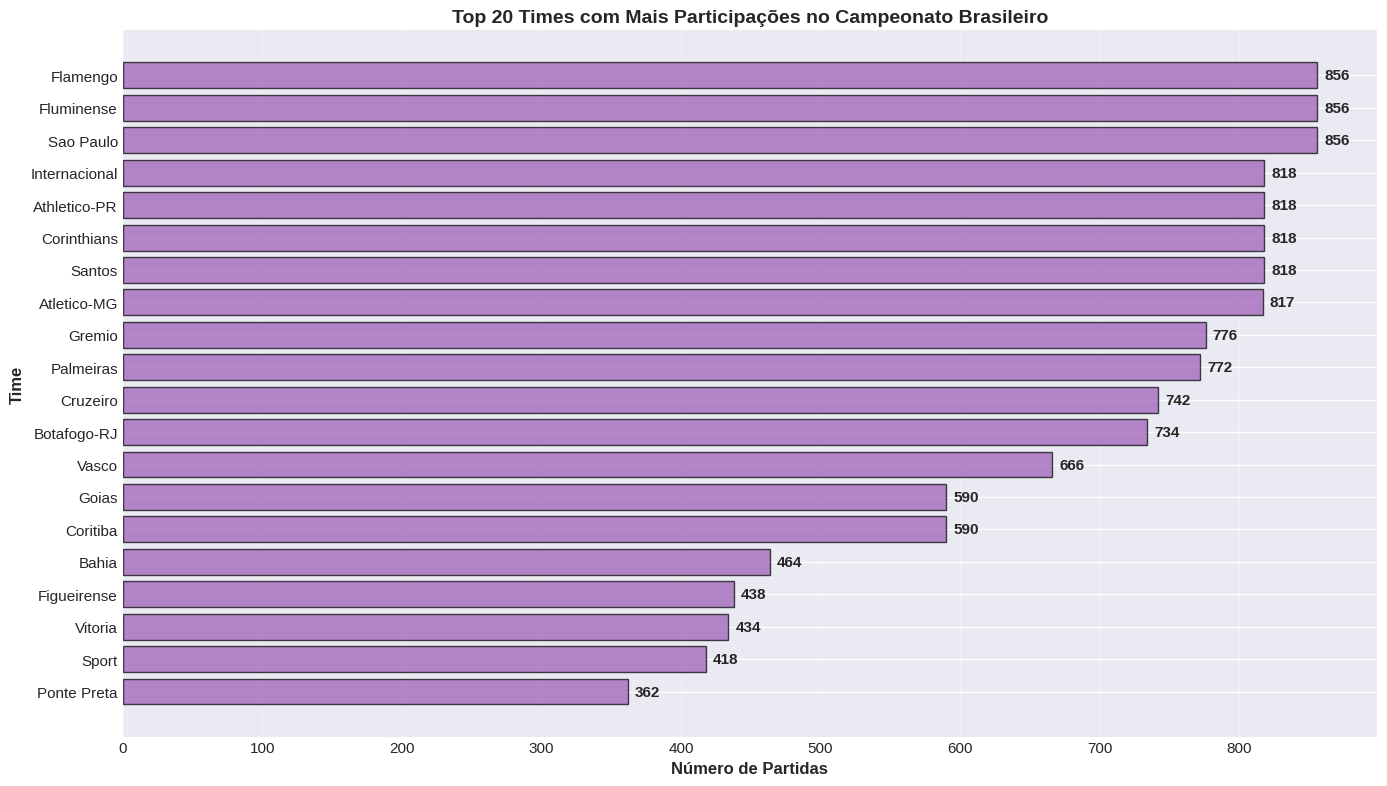

In [12]:
# Contando participações (mandante + visitante)
participacoes_mandante = df_partidas['mandante'].value_counts()
participacoes_visitante = df_partidas['visitante'].value_counts()
participacoes_total = (participacoes_mandante + participacoes_visitante).sort_values(ascending=False)

# Top 20 times
top_20_times = participacoes_total.head(20)

plt.figure(figsize=(14, 8))
plt.barh(range(len(top_20_times)), top_20_times.values, color='#9b59b6', edgecolor='black', alpha=0.7)
plt.yticks(range(len(top_20_times)), top_20_times.index)
plt.xlabel('Número de Partidas', fontsize=12, fontweight='bold')
plt.ylabel('Time', fontsize=12, fontweight='bold')
plt.title('Top 20 Times com Mais Participações no Campeonato Brasileiro', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Adicionando valores nas barras
for i, v in enumerate(top_20_times.values):
    plt.text(v + 5, i, f'{v:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 5.3. Análise de Vitórias

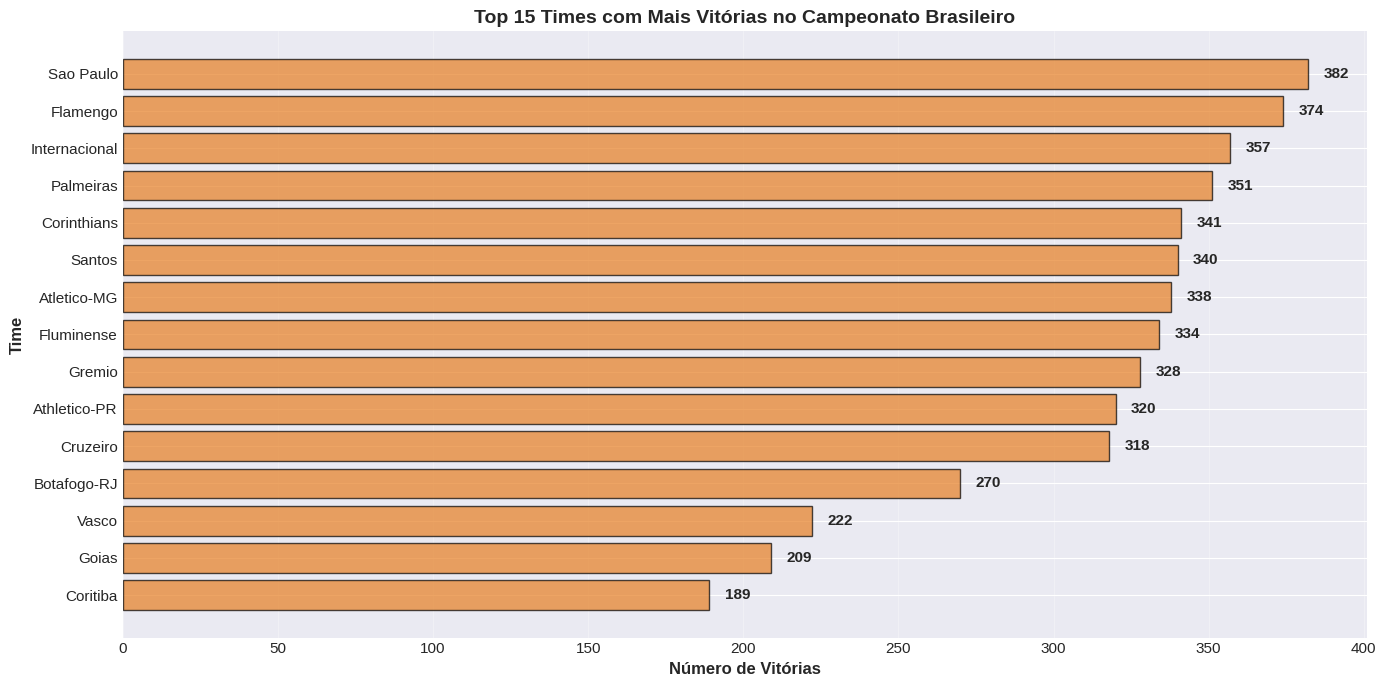


Time com mais vitórias: Sao Paulo (382 vitórias)


In [13]:
# Contando vitórias por time
vitorias = df_partidas['vencedor'].value_counts()

# Removendo empates (representados por '-')
vitorias = vitorias[vitorias.index != '-']

# Top 15 times vencedores
top_15_vencedores = vitorias.head(15)

plt.figure(figsize=(14, 7))
plt.barh(range(len(top_15_vencedores)), top_15_vencedores.values, color='#e67e22', edgecolor='black', alpha=0.7)
plt.yticks(range(len(top_15_vencedores)), top_15_vencedores.index)
plt.xlabel('Número de Vitórias', fontsize=12, fontweight='bold')
plt.ylabel('Time', fontsize=12, fontweight='bold')
plt.title('Top 15 Times com Mais Vitórias no Campeonato Brasileiro', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Adicionando valores nas barras
for i, v in enumerate(top_15_vencedores.values):
    plt.text(v + 5, i, f'{v:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTime com mais vitórias: {vitorias.idxmax()} ({vitorias.max()} vitórias)")

### 5.4. Distribuição de Resultados (Vitória/Empate)

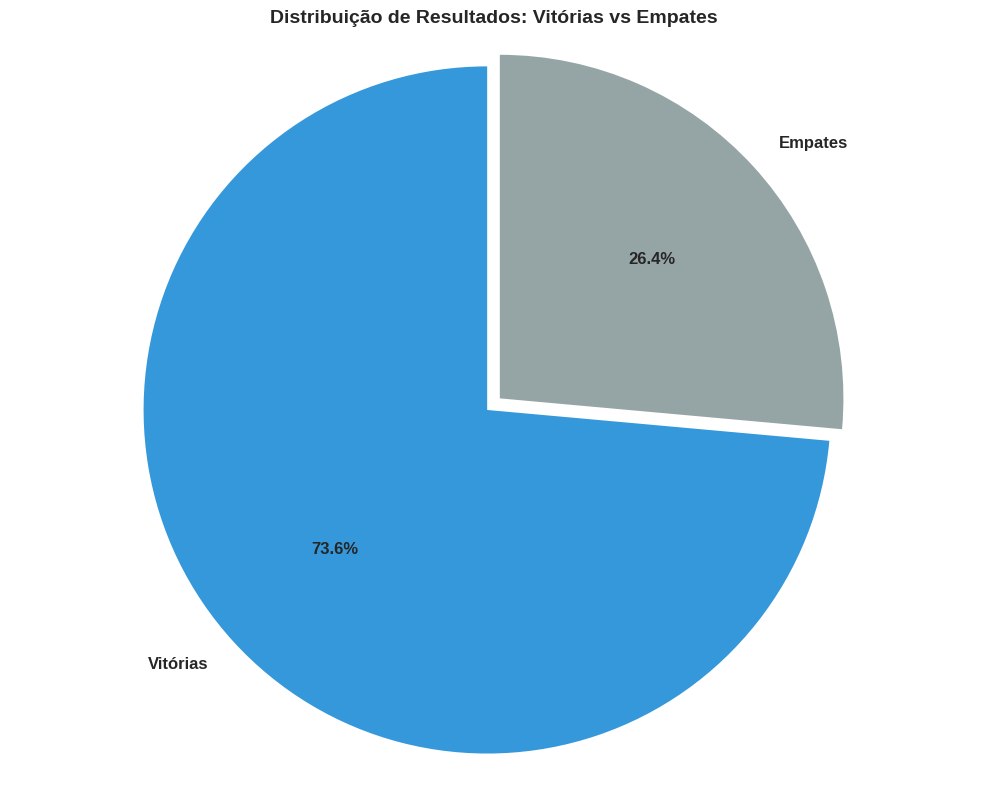


Total de vitórias: 6,463 (73.6%)
Total de empates: 2,322 (26.4%)


In [14]:
# Contando resultados
empates = len(df_partidas[df_partidas['vencedor'] == '-'])
vitorias_total = len(df_partidas[df_partidas['vencedor'] != '-'])

resultados = pd.Series({
    'Vitórias': vitorias_total,
    'Empates': empates
})

# Gráfico de pizza
plt.figure(figsize=(10, 8))
colors = ['#3498db', '#95a5a6']
explode = (0.05, 0)

plt.pie(resultados.values, labels=resultados.index, autopct='%1.1f%%',
        startangle=90, colors=colors, explode=explode,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Distribuição de Resultados: Vitórias vs Empates', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"\nTotal de vitórias: {vitorias_total:,} ({vitorias_total/len(df_partidas)*100:.1f}%)")
print(f"Total de empates: {empates:,} ({empates/len(df_partidas)*100:.1f}%)")

## 6. Análise de Gols

### 6.1. Visão Geral dos Gols

In [ ]:
df_gols.head(10)

### 6.2. Análise de Tipos de Gols

In [ ]:
# Tipos de gols
tipos_gols = df_gols['tipo_de_gol'].fillna('Normal').value_counts()

plt.figure(figsize=(12, 6))
plt.bar(tipos_gols.index, tipos_gols.values, color='#1abc9c', edgecolor='black', alpha=0.7)
plt.xlabel('Tipo de Gol', fontsize=12, fontweight='bold')
plt.ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.title('Distribuição de Gols por Tipo', fontsize=14, fontweight='bold')
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)

# Adicionando valores
for i, v in enumerate(tipos_gols.values):
    plt.text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTotal de gols: {len(df_gols):,}")
print(f"Gols normais: {tipos_gols.get('Normal', 0):,}")
print(f"Pênaltis: {tipos_gols.get('Penalty', 0):,}")
print(f"Gols contra: {tipos_gols.get('Gol Contra', 0):,}")

### 6.3. Times com Mais Gols Marcados

In [ ]:
# Times com mais gols (excluindo gols contra)
gols_por_time = df_gols[df_gols['tipo_de_gol'] != 'Gol Contra']['clube'].value_counts().head(20)

plt.figure(figsize=(14, 8))
plt.barh(range(len(gols_por_time)), gols_por_time.values, color='#e74c3c', edgecolor='black', alpha=0.7)
plt.yticks(range(len(gols_por_time)), gols_por_time.index)
plt.xlabel('Número de Gols Marcados', fontsize=12, fontweight='bold')
plt.ylabel('Time', fontsize=12, fontweight='bold')
plt.title('Top 20 Times com Mais Gols Marcados', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Adicionando valores
for i, v in enumerate(gols_por_time.values):
    plt.text(v + 10, i, f'{v:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 6.4. Distribuição de Gols por Minuto do Jogo

In [ ]:
# Convertendo minutos para numérico
df_gols['minuto_num'] = pd.to_numeric(df_gols['minuto'].str.replace('+', ''), errors='coerce')

# Criando intervalos de tempo
bins = [0, 15, 30, 45, 60, 75, 90, 120]
labels = ['0-15', '16-30', '31-45', '46-60', '61-75', '76-90', '90+']
df_gols['periodo'] = pd.cut(df_gols['minuto_num'], bins=bins, labels=labels, include_lowest=True)

# Contando gols por período
gols_por_periodo = df_gols['periodo'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(gols_por_periodo.index.astype(str), gols_por_periodo.values, color='#f39c12', edgecolor='black', alpha=0.7)
plt.xlabel('Período do Jogo (minutos)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Gols', fontsize=12, fontweight='bold')
plt.title('Distribuição de Gols por Período do Jogo', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Adicionando valores
for i, (label, valor) in enumerate(zip(gols_por_periodo.index, gols_por_periodo.values)):
    plt.text(i, valor + 50, f'{valor:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Análise de Cartões

### 7.1. Visão Geral dos Cartões

In [ ]:
df_cartoes.head(10)

### 7.2. Distribuição por Tipo de Cartão

In [ ]:
# Contagem de cartões
cartoes_tipo = df_cartoes['cartao'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(10, 8))
colors = ['#f1c40f', '#e74c3c']
explode = (0.05, 0.05)

plt.pie(cartoes_tipo.values, labels=cartoes_tipo.index, autopct='%1.1f%%',
        startangle=90, colors=colors, explode=explode,
        textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Distribuição de Cartões: Amarelos vs Vermelhos', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"\nCartões Amarelos: {cartoes_tipo.get('Amarelo', 0):,}")
print(f"Cartões Vermelhos: {cartoes_tipo.get('Vermelho', 0):,}")
print(f"Total de cartões: {len(df_cartoes):,}")

### 7.3. Times com Mais Cartões

In [ ]:
# Times com mais cartões
cartoes_por_time = df_cartoes['clube'].value_counts().head(20)

plt.figure(figsize=(14, 8))
plt.barh(range(len(cartoes_por_time)), cartoes_por_time.values, color='#c0392b', edgecolor='black', alpha=0.7)
plt.yticks(range(len(cartoes_por_time)), cartoes_por_time.index)
plt.xlabel('Número de Cartões', fontsize=12, fontweight='bold')
plt.ylabel('Time', fontsize=12, fontweight='bold')
plt.title('Top 20 Times com Mais Cartões (Amarelos + Vermelhos)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Adicionando valores
for i, v in enumerate(cartoes_por_time.values):
    plt.text(v + 10, i, f'{v:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 7.4. Distribuição de Cartões por Minuto

In [ ]:
# Convertendo minutos para numérico
df_cartoes['minuto_num'] = pd.to_numeric(df_cartoes['minuto'], errors='coerce')

# Criando intervalos de tempo
bins = [0, 15, 30, 45, 60, 75, 90, 120]
labels = ['0-15', '16-30', '31-45', '46-60', '61-75', '76-90', '90+']
df_cartoes['periodo'] = pd.cut(df_cartoes['minuto_num'], bins=bins, labels=labels, include_lowest=True)

# Contando cartões por período e tipo
cartoes_periodo = df_cartoes.groupby(['periodo', 'cartao']).size().unstack(fill_value=0)

# Gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
cartoes_periodo.plot(kind='bar', stacked=False, color=['#f1c40f', '#e74c3c'],
                     edgecolor='black', alpha=0.7, figsize=(12, 6))
plt.xlabel('Período do Jogo (minutos)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Cartões', fontsize=12, fontweight='bold')
plt.title('Distribuição de Cartões por Período do Jogo', fontsize=14, fontweight='bold')
plt.legend(['Amarelo', 'Vermelho'], fontsize=11)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Análise de Estatísticas

### 8.1. Visão Geral das Estatísticas

In [ ]:
df_estatisticas.head(10)

### 8.2. Informações e Tipos de Dados

In [ ]:
df_estatisticas.info()

### 8.3. Limpeza e Conversão de Dados Numéricos

In [ ]:
# Convertendo colunas numéricas
colunas_numericas = ['chutes', 'chutes_no_alvo', 'passes', 'faltas', 
                     'cartao_amarelo', 'cartao_vermelho', 'impedimentos', 'escanteios']

for col in colunas_numericas:
    df_estatisticas[col] = pd.to_numeric(df_estatisticas[col], errors='coerce')

# Convertendo posse de bola (removendo % e convertendo)
df_estatisticas['posse_de_bola'] = df_estatisticas['posse_de_bola'].str.replace('%', '').astype(float)

print("Dados convertidos com sucesso!")
df_estatisticas.describe()

### 8.4. Correlação entre Estatísticas

In [ ]:
# Matriz de correlação
colunas_correlacao = ['chutes', 'chutes_no_alvo', 'posse_de_bola', 'passes', 
                      'faltas', 'impedimentos', 'escanteios']

correlacao = df_estatisticas[colunas_correlacao].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlação entre Estatísticas de Jogo', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### 8.5. Distribuição de Chutes por Time

In [ ]:
# Times com mais chutes (média)
chutes_por_time = df_estatisticas.groupby('clube')['chutes'].agg(['sum', 'mean', 'count'])
chutes_por_time = chutes_por_time[chutes_por_time['count'] >= 50].sort_values('sum', ascending=False).head(15)

plt.figure(figsize=(14, 7))
plt.barh(range(len(chutes_por_time)), chutes_por_time['sum'].values, 
         color='#16a085', edgecolor='black', alpha=0.7)
plt.yticks(range(len(chutes_por_time)), chutes_por_time.index)
plt.xlabel('Total de Chutes', fontsize=12, fontweight='bold')
plt.ylabel('Time', fontsize=12, fontweight='bold')
plt.title('Top 15 Times com Mais Chutes (Total)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Adicionando valores
for i, v in enumerate(chutes_por_time['sum'].values):
    plt.text(v + 50, i, f'{int(v):,}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 8.6. Eficiência de Chutes (Chutes no Alvo / Total de Chutes)

In [ ]:
# Calculando eficiência de chutes
eficiencia = df_estatisticas.groupby('clube').agg({
    'chutes': 'sum',
    'chutes_no_alvo': 'sum'
})

eficiencia = eficiencia[eficiencia['chutes'] > 0]
eficiencia['eficiencia'] = (eficiencia['chutes_no_alvo'] / eficiencia['chutes'] * 100)
eficiencia = eficiencia[eficiencia['chutes'] >= 500].sort_values('eficiencia', ascending=False).head(15)

plt.figure(figsize=(14, 7))
plt.barh(range(len(eficiencia)), eficiencia['eficiencia'].values, 
         color='#27ae60', edgecolor='black', alpha=0.7)
plt.yticks(range(len(eficiencia)), eficiencia.index)
plt.xlabel('Eficiência de Chutes (%)', fontsize=12, fontweight='bold')
plt.ylabel('Time', fontsize=12, fontweight='bold')
plt.title('Top 15 Times com Melhor Eficiência de Chutes (min. 500 chutes)', 
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Adicionando valores
for i, v in enumerate(eficiencia['eficiencia'].values):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 9. Análises Integradas

### 9.1. Resumo Estatístico Geral

In [ ]:
print("="*80)
print(" "*20 + "RESUMO ESTATÍSTICO DO CAMPEONATO BRASILEIRO")
print("="*80)

print(f"\nPARTIDAS:")
print(f"   • Total de partidas: {len(df_partidas):,}")
print(f"   • Período: {df_partidas['ano'].min()} a {df_partidas['ano'].max()}")
print(f"   • Times participantes: {len(todos_times)}")
print(f"   • Vitórias: {vitorias_total:,} ({vitorias_total/len(df_partidas)*100:.1f}%)")
print(f"   • Empates: {empates:,} ({empates/len(df_partidas)*100:.1f}%)")

print(f"\nGOLS:")
print(f"   • Total de gols: {len(df_gols):,}")
print(f"   • Média de gols por partida: {len(df_gols)/len(df_partidas):.2f}")
print(f"   • Gols de pênalti: {tipos_gols.get('Penalty', 0):,}")
print(f"   • Gols contra: {tipos_gols.get('Gol Contra', 0):,}")

print(f"\nCARTÕES:")
print(f"   • Total de cartões: {len(df_cartoes):,}")
print(f"   • Cartões amarelos: {cartoes_tipo.get('Amarelo', 0):,} ({cartoes_tipo.get('Amarelo', 0)/len(df_cartoes)*100:.1f}%)")
print(f"   • Cartões vermelhos: {cartoes_tipo.get('Vermelho', 0):,} ({cartoes_tipo.get('Vermelho', 0)/len(df_cartoes)*100:.1f}%)")
print(f"   • Média de cartões por partida: {len(df_cartoes)/len(df_partidas):.2f}")

print(f"\nDESTAQUES:")
print(f"   • Time com mais vitórias: {vitorias.idxmax()} ({vitorias.max()} vitórias)")
print(f"   • Time com mais gols: {gols_por_time.index[0]} ({gols_por_time.values[0]:,} gols)")
print(f"   • Time com mais cartões: {cartoes_por_time.index[0]} ({cartoes_por_time.values[0]:,} cartões)")

print("\n" + "="*80)